<a href="https://colab.research.google.com/github/lucaskydelima/Cluster-Analysis-in-Python/blob/main/K_means_clustering_exercise_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [363]:
# Generate X (N X D)
# Initialize cluster centers by randomly choosing K points from X
# Loop:
    # 2 steps discussed previously
    # Exit loop if converged
# Scatterplot of data colored by cluster identity, showing cluster centers

In [364]:
import numpy as np
import matplotlib.pyplot as plt

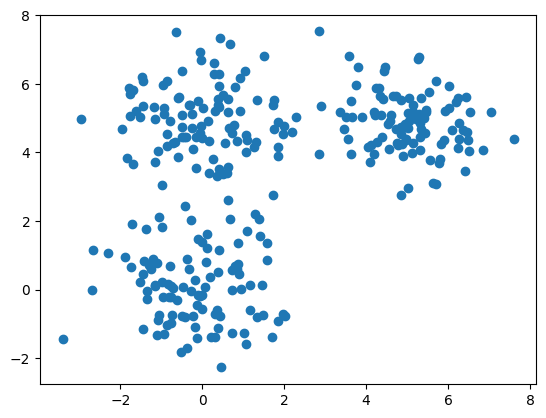

In [365]:
K = 3
D = 2
N = 300

mu = np.array([
    [0,0],
    [0,5],
    [5,5]
])

# Generate X (N X D)
X = np.zeros((N,D))

X[:100,] = np.random.randn(100,D) + mu[0]
X[100:200,] = np.random.randn(100, D) + mu[1]
X[200:300,] = np.random.randn(100, D) + mu[2]

plt.scatter(x=X[:,0], y=X[:,1])

In [366]:
# Initialize cluster centers by randomly choosing K points from X
rng = np.random.default_rng()
cluster_centers = rng.choice(X, 3)
cluster_centers

array([[-0.94953828, -0.22334858],
       [ 1.5917246 ,  1.3577851 ],
       [ 0.87811464,  0.75523691]])

In [367]:
# Loop:
    # 2 steps discussed previously
    # Exit loop if converged

cluster_identities = np.zeros(N)
saved_cluster_identities = []
max_iters = 20

for i in range(max_iters):

  old_cluster_identities = np.copy(cluster_identities)
  saved_cluster_identities.append(old_cluster_identities)

  for index, value in enumerate(X):
    distances = np.empty((0))
    for center in cluster_centers:
      d = np.linalg.norm(value - center)
      distances = np.append(distances, d)
    cluster_identities[index] = np.argmin(distances)

  if(np.array_equal(cluster_identities, old_cluster_identities)):
    print(f"Converged on step {i}")
    break
 
  for k in range(K):
    cluster_centers[k,:] = X[cluster_identities==k].mean(axis=0)


Converged on step 7


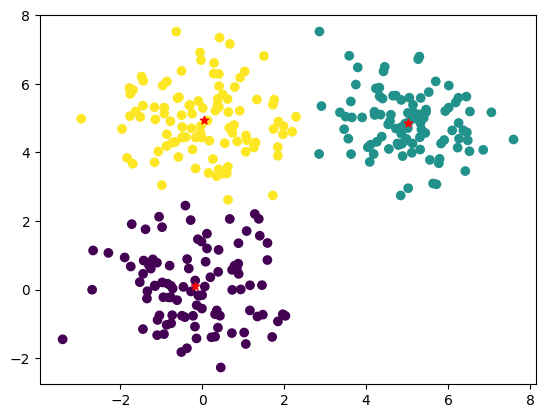

In [368]:
# Scatterplot of data colored by cluster identity, showing cluster centers
plt.scatter(x=X[:,0], y=X[:,1], c=cluster_identities)
plt.scatter(x=cluster_centers[:,0], y=cluster_centers[:,1], c="red", marker="*")

<ipython-input-369-4ba48941a8a7>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(M, 1, i + 1)


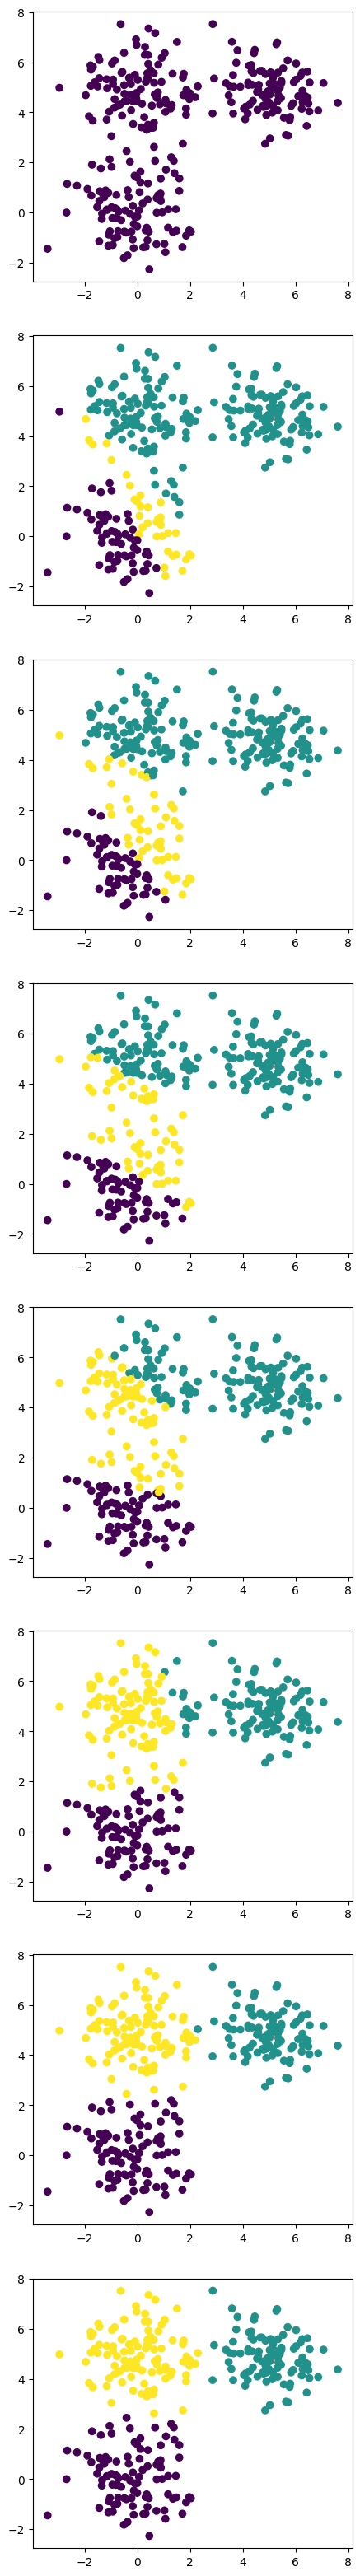

In [369]:
# Showing training progress 

M = len(saved_cluster_identities)
# Set one size for all subplots
fig, ax = plt.subplots(figsize=(5, 5 * M))

for i in range(M):
  plt.subplot(M, 1, i + 1)
  Y = saved_cluster_identities[i]
  plt.scatter(x=X[:,0], y=X[:,1], c=Y)